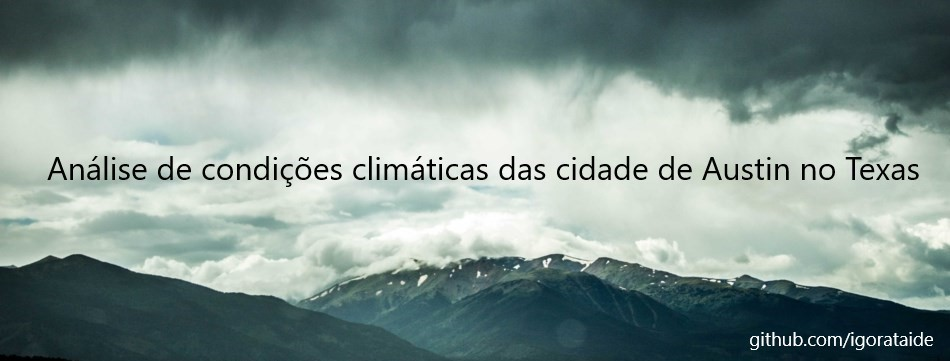

### Este projeto foi desenvolvido com a finalidade de fazer uma análise exploratória das diversas condições climáticas da cidade de Austin no Texas e observar suas variações no período de 3 anos, sendo eles 2014, 2015 e 2016. 


##### O dataset utilizado neste projeto é um banco de dados público, e está disponibilizado no site do kaggle neste link a seguir [austin_weather.csv](https://www.kaggle.com/grubenm/austin-weather)

**Legenda das variáveis contidas no dataset:**

* Date (YYYY-MM-DD)
* TempHighF (High temperature, in Fahrenheit)
* TempAvgF (Average temperature, in Fahrenheit)
* TempLowF (Low temperature, in Fahrenheit)
* DewPointHighF (High dew point, in Fahrenheit)
* DewPointAvgF (Average dew point, in Fahrenheit)
* DewPointLowF (Low dew point, in Fahrenheit)
* HumidityHighPercent (High humidity, as a percentage)
* HumidityAvgPercent (Average humidity, as a percentage)
* HumidityLowPercent (Low humidity, as a percentage)
* SeaLevelPressureHighInches (High sea level pressure, in inches)
* SeaLevelPressureAvgInches (Average sea level pressure, in inches)
* SeaLevelPressureLowInches (Low sea level pressure, in inches)
* VisibilityHighMiles (High visibility, in miles)
* VisibilityAvgMiles (Average visibility, in miles)
* VisibilityLowMiles (Low visibility, in miles)
* WindHighMPH (High wind speed, in miles per hour)
* WindAvgMPH (Average wind speed, in miles per hour)
* WindGustMPH (Highest wind speed gust, in miles per hour)
* PrecipitationSumInches (Total precipitation, in inches) ('T' if Trace)
* Events (Adverse weather events. ' ' if None)

# 1. ETL - Carregamento e tratamento dos dados

In [309]:
# importando as bibliotecas para análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from google.colab import files
upload = files.upload()

Saving austin_weather.csv to austin_weather (2).csv


In [310]:
# carregando o dataset
df = pd.read_csv('austin_weather.csv')

In [311]:
# mostrando as 5 primeiras linhas do dataset
df.head(5)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [312]:
# mostrando o tamanho do dataset
print('O dataset possui {} linhas e {} colunas.'.format(df.shape[0], df.shape[1]))

O dataset possui 1319 linhas e 21 colunas.


In [313]:
# listando as colunas
df.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [314]:
# observando todas informações 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [315]:
# verificação de valores faltantes ou nulos por coluna
df.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

In [316]:
# formato dos dados de cada coluna
df.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [317]:
# contando quantas vezes valores se repetem
for col in df:
  print(col)
  print(df[col].value_counts())
  print('-' * 50)


Date
2014-06-21    1
2017-01-01    1
2015-10-16    1
2017-06-19    1
2015-11-23    1
             ..
2014-03-17    1
2017-03-30    1
2014-03-21    1
2017-06-27    1
2015-11-13    1
Name: Date, Length: 1319, dtype: int64
--------------------------------------------------
TempHighF
86     50
92     42
84     41
91     41
94     38
       ..
107     1
39      1
41      1
106     1
32      1
Name: TempHighF, Length: 74, dtype: int64
--------------------------------------------------
TempAvgF
84    61
89    48
76    45
86    42
87    41
      ..
38     2
33     2
32     2
30     1
93     1
Name: TempAvgF, Length: 64, dtype: int64
--------------------------------------------------
TempLowF
75    71
76    66
77    59
74    50
70    40
      ..
28     2
21     1
81     1
24     1
19     1
Name: TempLowF, Length: 61, dtype: int64
--------------------------------------------------
DewPointHighF
74    112
75     95
73     80
67     54
70     54
     ... 
13      1
15      1
25      1
26      1
22

# Tratando os valores


In [318]:
# preenchendo valores sem eventos da coluna Events com 'None'
df['Events'][df['Events'] == ' '] = 'None'
df['Events'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


None                         903
Rain                         192
Rain , Thunderstorm          137
Fog , Rain , Thunderstorm     33
Fog                           21
Thunderstorm                  17
Fog , Rain                    14
Fog , Thunderstorm             1
Rain , Snow                    1
Name: Events, dtype: int64

In [319]:
# tirando espaços vazios da colunas Events
df['Events'] = df['Events'].str.replace(' ', '')

In [320]:
# Deletando valores com 'T' da coluna PrecipitationSumInches, pois estes significam que houve indícios de precipitações, mas não foi medido há quantidade.
df['PrecipitationSumInches'] = df['PrecipitationSumInches'].str.replace('T','')
df['PrecipitationSumInches'] = pd.to_numeric(df['PrecipitationSumInches'])
df.dropna(inplace=True)

In [321]:
# tranformando o tipo da coluna 'date' em datetime 
df['Date'] = pd.to_datetime(df['Date'])

In [322]:
# excluindo linhas com valores com '-'
indice = []
for d in df:
  if df[d].dtype == object:
   for i in df[df[d]== '-'].index:
     if not i in indice:
      indice.append(i)

df.drop(index= indice, inplace = True)

In [323]:
#transformando valores numéricos em tipo float
for d in df:
  if d != 'Events' and d != 'Date':
    df[d] = df[d].astype(float) 

In [324]:
df.dtypes

Date                          datetime64[ns]
TempHighF                            float64
TempAvgF                             float64
TempLowF                             float64
DewPointHighF                        float64
DewPointAvgF                         float64
DewPointLowF                         float64
HumidityHighPercent                  float64
HumidityAvgPercent                   float64
HumidityLowPercent                   float64
SeaLevelPressureHighInches           float64
SeaLevelPressureAvgInches            float64
SeaLevelPressureLowInches            float64
VisibilityHighMiles                  float64
VisibilityAvgMiles                   float64
VisibilityLowMiles                   float64
WindHighMPH                          float64
WindAvgMPH                           float64
WindGustMPH                          float64
PrecipitationSumInches               float64
Events                                object
dtype: object

In [325]:
# tranformando as colunas de umidade relativa do ar em números decimais
df[['HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent']] = df[['HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent']] /100

In [326]:
# Quantidade de valores por ano.
df['Date'].dt.year.value_counts()

2016    330
2015    330
2014    329
2017    186
2013      8
Name: Date, dtype: int64

In [327]:
# excluindo dados dos anos 2013 e 2017, pois não tinham tinham dados de todos os meses.
df['Year'] = df['Date'].dt.year
df.drop(index = df[df['Year'] == 2013].index, inplace = True)
df.drop(index = df[df['Year'] == 2017].index, inplace = True)
df['Date'].dt.year.value_counts()

2016    330
2015    330
2014    329
Name: Date, dtype: int64

# 2. EDA -  Análise exploratória dos dados


### 2.1. Análise de Temperatura


In [328]:
# criando uma coluna 'Month' e uma coluna da diferença entre a temperatura e o ponto de orvalho para facilitar as análises
df['Month'] = df['Date'].dt.month
df['Diff_dew_air'] = df['TempAvgF'] - df['DewPointAvgF']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


(55.0, 85.0)

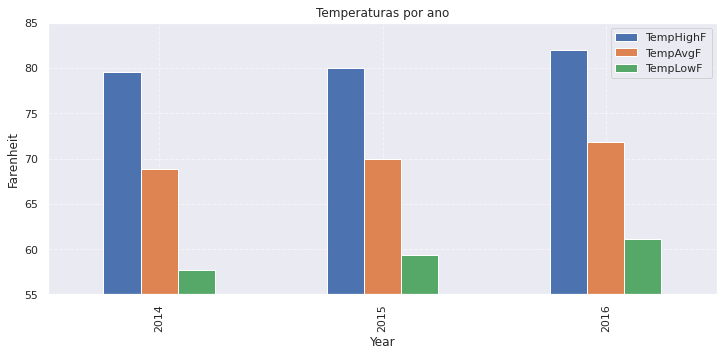

In [329]:
# média de temperatura por ano
temp = df.groupby('Year')['TempHighF','TempAvgF', 'TempLowF'].mean()
temp.plot( kind='bar', figsize=(12,5), ylabel = 'Farenheit', title='Temperaturas por ano');
plt.grid(linestyle = '--', alpha = 0.5)
plt.ylim(55,85)

In [330]:
# função para agrupar valores e fazer a média por mês
def agrupa_media(coluna):
  ano14 = df[df['Year'] == 2014].groupby('Month')[[coluna]].mean()
  ano15 = df[df['Year'] == 2015].groupby('Month')[[coluna]].mean()
  ano16 = df[df['Year'] == 2016].groupby('Month')[[coluna]].mean()
  media_ano = df.groupby('Month')[coluna].mean()
  dict_ano = {'2014': ano14[coluna], '2015': ano15[coluna], '2016': ano16[coluna], 'Média': media_ano}
  ano = pd.DataFrame(dict_ano)
  return ano

(40.0, 90.0)

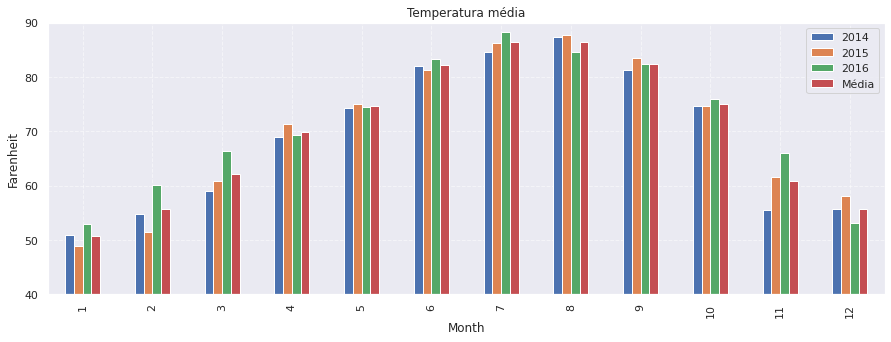

In [331]:
# média de temperatura por mês 
agrupa_media('TempAvgF').plot( kind='bar', title='Temperatura média', figsize=(15,5), ylabel = 'Farenheit');
plt.grid(linestyle = '--', alpha = 0.5)
plt.ylim(40,90)

In [332]:
# valores do gráfico acima
agrupa_media('TempAvgF')

,2014,2015,2016,Média
Month,,,,
1,50.870968,48.857143,52.920000,50.809524
2,54.760000,51.423077,60.172414,55.637500
3,59.033333,60.866667,66.379310,62.044944
4,68.958333,71.307692,69.240000,69.866667
5,74.296296,75.035714,74.518519,74.621951
6,82.050000,81.250000,83.300000,82.243590
7,84.580645,86.296296,88.266667,86.363636
8,87.300000,87.629630,84.645161,86.465909
9,81.321429,83.560000,82.440000,82.397436


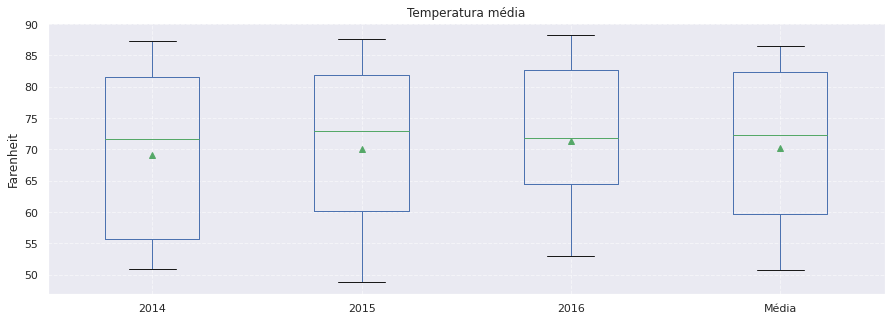

In [333]:
# distribuição dos valores de temperaturas por ano
agrupa_media('TempAvgF').plot( kind='box', title='Temperatura média', figsize=(15,5), ylabel = 'Farenheit', showmeans = True);
plt.grid(linestyle = '--', alpha = 0.5)

### 2.2. Análise da Temperatura Ponto de orvalho

(7.0, 21.0)

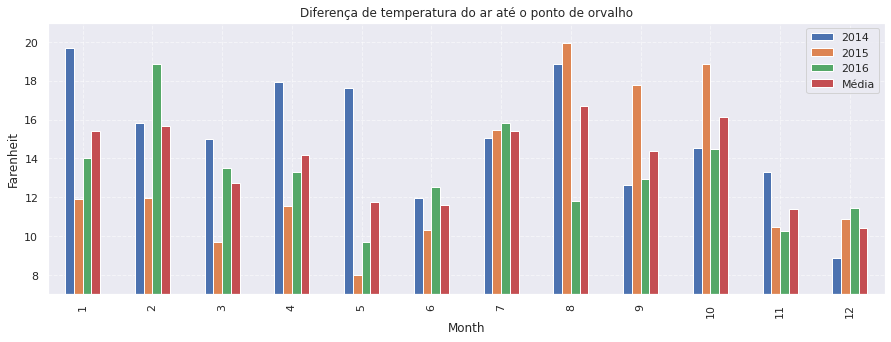

In [334]:
# média de temperatura do ar até ponto de orvalho por mês 
agrupa_media('Diff_dew_air').plot( kind='bar', title='Diferença de temperatura do ar até o ponto de orvalho', figsize=(15,5), ylabel = 'Farenheit');
plt.grid(linestyle = '--', alpha = 0.5)
plt.ylim(7, 21)

In [335]:
# valores do gráfico acima
agrupa_media('Diff_dew_air')

,2014,2015,2016,Média
Month,,,,
1,19.709677,11.892857,14.040000,15.416667
2,15.840000,11.961538,18.862069,15.675000
3,15.000000,9.700000,13.517241,12.730337
4,17.958333,11.538462,13.280000,14.173333
5,17.629630,8.000000,9.703704,11.731707
6,11.950000,10.321429,12.533333,11.589744
7,15.032258,15.444444,15.800000,15.420455
8,18.866667,19.962963,11.806452,16.715909
9,12.642857,17.760000,12.960000,14.384615


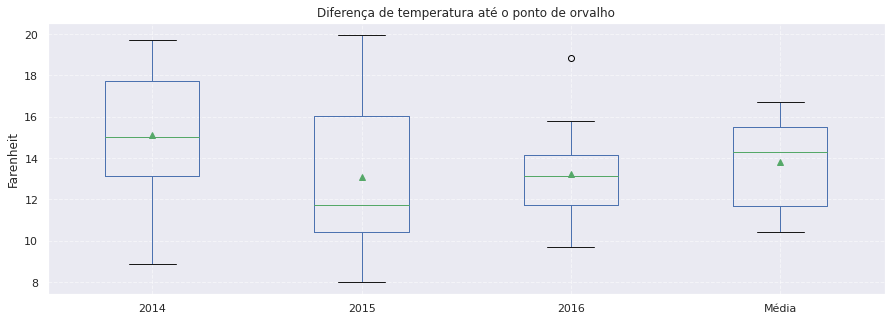

In [336]:
# distribuição dos valores de temperatura do ponto de orvalho por ano
agrupa_media('Diff_dew_air').plot( kind='box', title='Diferença de temperatura até o ponto de orvalho', figsize=(15,5), ylabel = 'Farenheit', showmeans = True);
plt.grid(linestyle = '--', alpha = 0.5)

### 2.3. Análise da Humidade relativa do ar

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


(0.4, 1.0)

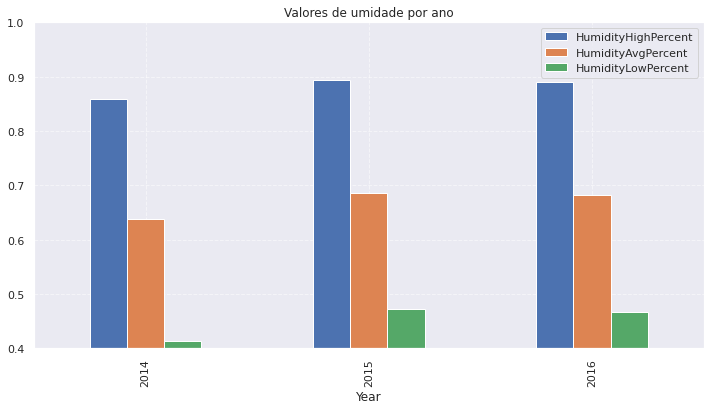

In [337]:
# média da umidade relativa do ar por ano 
hum = df.groupby('Year')['HumidityHighPercent','HumidityAvgPercent','HumidityLowPercent'].mean()
hum.plot( kind='bar', figsize=(12,6), title = 'Valores de umidade por ano');
plt.grid(linestyle = '--', alpha = 0.5)
plt.ylim(0.4,1.0)

(0.5, 0.8)

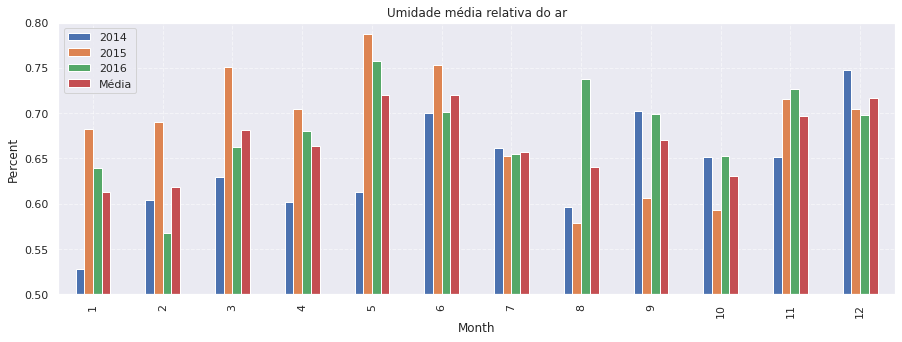

In [338]:
# média da umidade relativa do ar por mês 
agrupa_media('HumidityAvgPercent').plot( kind='bar', title='Umidade média relativa do ar', figsize=(15,5), ylabel = 'Percent');
plt.grid(linestyle = '--', alpha = 0.5)
plt.ylim(0.5,0.8)

In [339]:
# valores do gráfico acima
agrupa_media('HumidityAvgPercent')

,2014,2015,2016,Média
Month,,,,
1,0.527742,0.682143,0.639600,0.612500
2,0.604400,0.690000,0.567241,0.618750
3,0.629667,0.751000,0.662759,0.681348
4,0.602083,0.704615,0.680000,0.663600
5,0.612593,0.787500,0.757407,0.720000
6,0.700000,0.753214,0.701333,0.719615
7,0.661613,0.652963,0.654667,0.656591
8,0.596667,0.578889,0.737419,0.640795
9,0.702857,0.606800,0.698800,0.670769


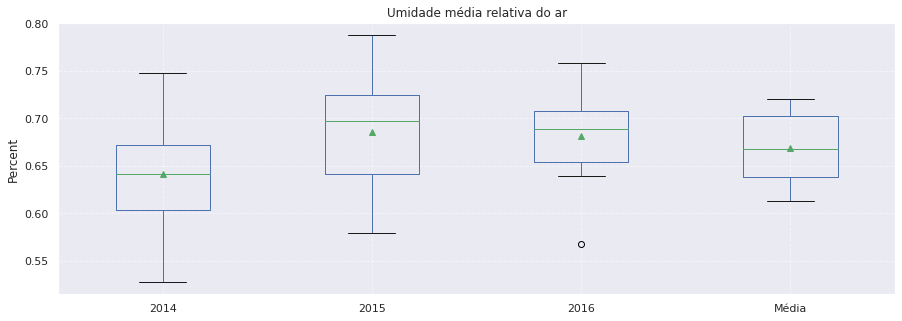

In [340]:
# distribuição dos valores de umidade relativa do ar por ano
agrupa_media('HumidityAvgPercent').plot( kind='box', title='Umidade média relativa do ar', figsize=(15,5), ylabel = 'Percent', showmeans = True);
plt.grid(linestyle = '--', alpha = 0.5)

### 2.4. Análise da Pressão atmosférica média a nível do mar

(29.9, 30.3)

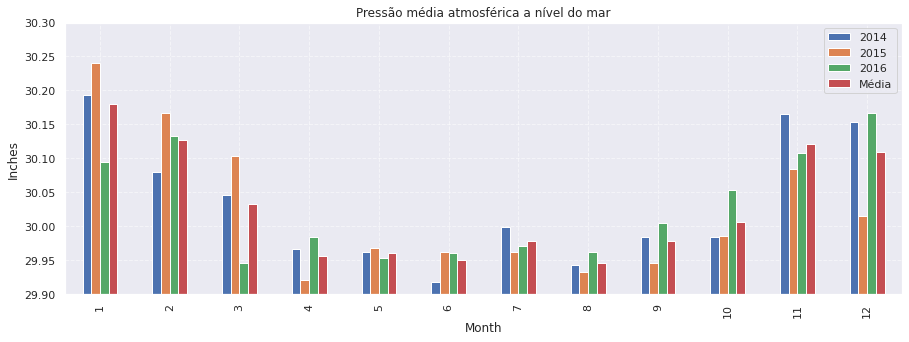

In [341]:
# média da pressão atmosférica a nível do mar por mês
agrupa_media('SeaLevelPressureAvgInches').plot( kind='bar', title='Pressão média atmosférica a nível do mar', figsize=(15,5), ylabel = 'Inches');
plt.grid(linestyle = '--', alpha = 0.5)
plt.ylim(29.9,30.3)

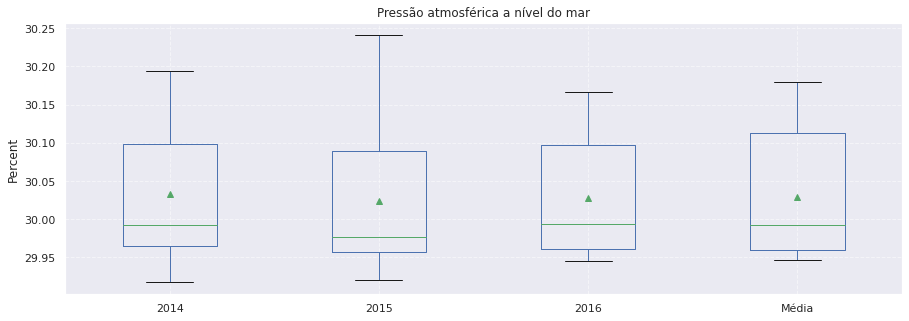

In [342]:
# distribuição dos valores de pressão atmosférica média a nível do mar por ano
agrupa_media('SeaLevelPressureAvgInches').plot( kind='box', title='Pressão atmosférica a nível do mar', figsize=(15,5), ylabel = 'Percent', showmeans=True);
plt.grid(linestyle = '--', alpha = 0.5)

### 2.5. Análise da Visilbilidade mínima  em milhas 

(3.0, 10.0)

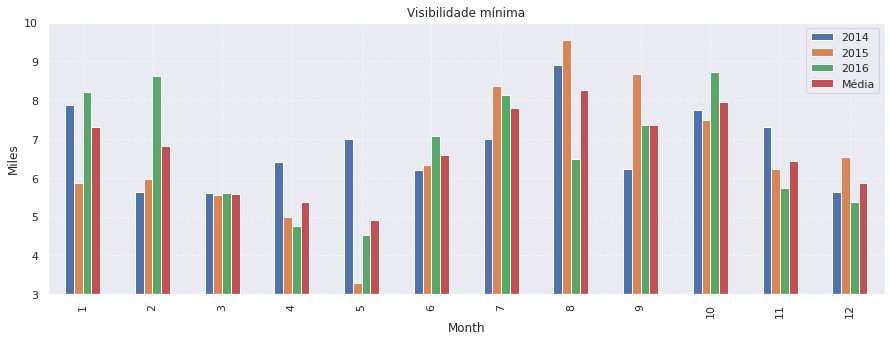

In [343]:
# visibilidade mínima por mês 
agrupa_media('VisibilityLowMiles').plot( kind='bar', title='Visibilidade mínima', figsize=(15,5), ylabel = 'Miles');
plt.grid(linestyle = '--', alpha = 0.5)
plt.ylim(3,10)

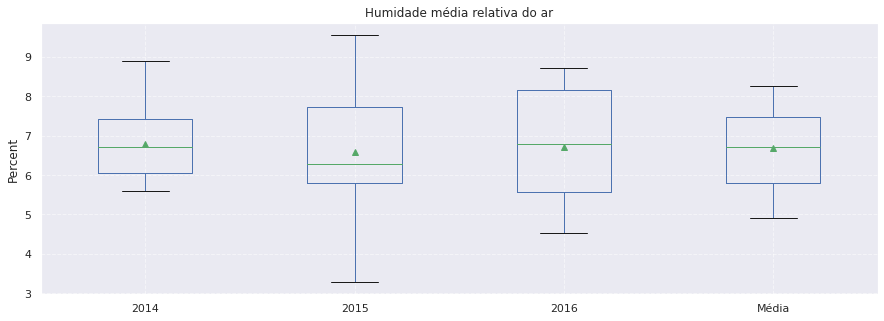

In [344]:
# distribuição dos valores de visibilidade mínima por ano 
agrupa_media('VisibilityLowMiles').plot( kind='box', title='Humidade média relativa do ar', figsize=(15,5), ylabel = 'Percent', showmeans=True);
plt.grid(linestyle = '--', alpha = 0.5)

### 2.6. Análise da Velocidade do vento com rajadas

(16.0, 26.0)

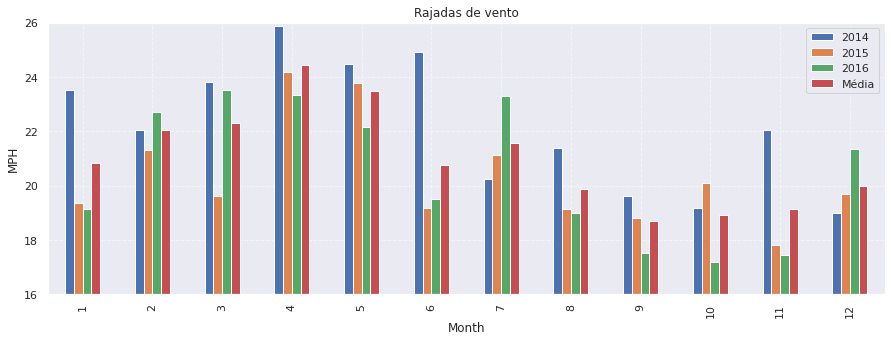

In [345]:
# Rajadas de vento
agrupa_media('WindGustMPH').plot( kind='bar', title='Rajadas de vento', figsize=(15,5), ylabel = 'MPH');
plt.grid(linestyle = '--', alpha = 0.5)
plt.ylim(16,26)

In [346]:
# valores do gráfico acima 
agrupa_media('WindGustMPH')

,2014,2015,2016,Média
Month,,,,
1,23.516129,19.357143,19.120000,20.821429
2,22.040000,21.307692,22.689655,22.037500
3,23.800000,19.633333,23.517241,22.303371
4,25.875000,24.192308,23.320000,24.440000
5,24.481481,23.785714,22.148148,23.475610
6,24.900000,19.178571,19.500000,20.769231
7,20.258065,21.111111,23.300000,21.556818
8,21.400000,19.148148,19.000000,19.863636
9,19.607143,18.800000,17.520000,18.679487


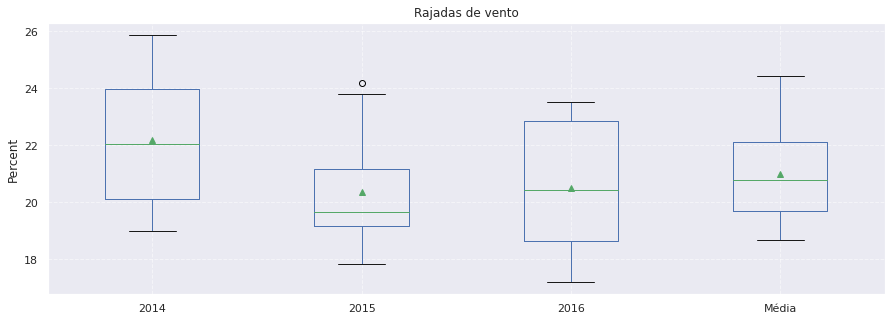

In [347]:
# distribuição dos valores de Rajadas de vento por ano
agrupa_media('WindGustMPH').plot( kind='box', title='Rajadas de vento', figsize=(15,5), ylabel = 'Percent', showmeans=True);
plt.grid(linestyle = '--', alpha = 0.5)

### 2.7. Análises das Precipitações

In [348]:
# total de precipitação 
print('{} inches'.format(df['PrecipitationSumInches'].sum()))

134.17 inches


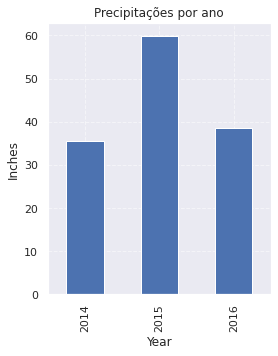

In [349]:
# Soma das precipitações por ano
precip_ano = df.groupby('Year')['PrecipitationSumInches'].sum()
precip_ano.plot( kind='bar', title='Precipitações por ano', figsize=(4,5), ylabel = 'Inches');
plt.grid(linestyle = '--', alpha = 0.5)

In [350]:
# Função que agrupa e soma os valores por ano
def agrupa_soma(coluna):
  ano14 = df[df['Year'] == 2014].groupby('Month')[[coluna]].sum()
  ano15 = df[df['Year'] == 2015].groupby('Month')[[coluna]].sum()
  ano16 = df[df['Year'] == 2016].groupby('Month')[[coluna]].sum()
  dict_ano = {'2014': ano14[coluna], '2015': ano15[coluna], '2016': ano16[coluna]}
  ano = pd.DataFrame(dict_ano)
  return ano

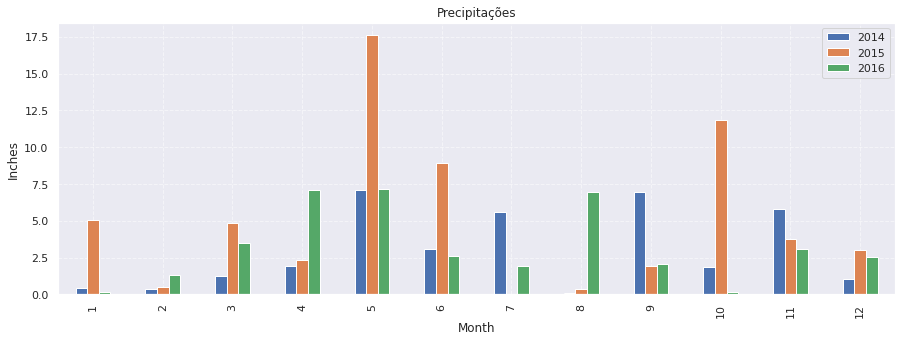

In [351]:
# precipitações por mês
agrupa_soma('PrecipitationSumInches').plot( kind='bar', title='Precipitações', figsize=(15,5), ylabel = 'Inches');
plt.grid(linestyle = '--', alpha = 0.5)

In [352]:
# valores do gráfico acima 
agrupa_soma('PrecipitationSumInches')

,2014,2015,2016
Month,,,
1,0.45,5.02,0.14
2,0.38,0.50,1.34
3,1.27,4.83,3.51
4,1.89,2.31,7.12
5,7.09,17.59,7.15
6,3.08,8.89,2.61
7,5.58,0.00,1.94
8,0.12,0.35,6.93
9,6.98,1.89,2.09


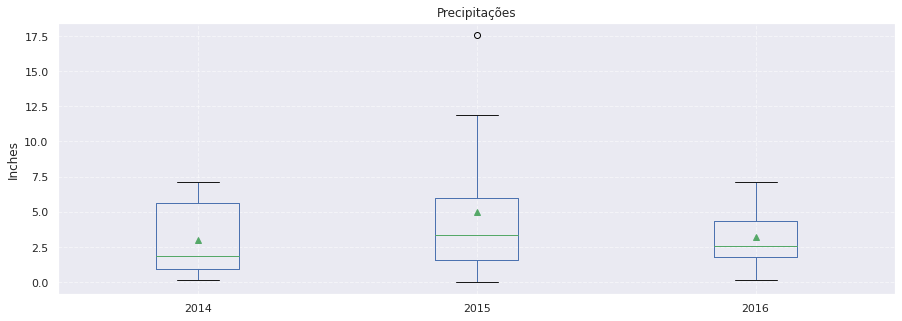

In [353]:
# distribuição dos valores precipitações por mês
agrupa_soma('PrecipitationSumInches').plot( kind='box', title='Precipitações', figsize=(15,5), ylabel = 'Inches', showmeans=True);
plt.grid(linestyle = '--', alpha = 0.5)

### 2.8. Análise dos Eventos climáticos

In [354]:
# Função que agrupa e conta os eventos por mês
def agrupa_eventos(event):
  evento14 = event[event['Year'] == 2014].groupby('Month')[['Events']].count()
  evento15 = event[event['Year'] == 2015].groupby('Month')[['Events']].count()
  evento16 = event[event['Year'] == 2016].groupby('Month')[['Events']].count()
  dict_evento = {'2014':  evento14['Events'], '2015': evento15['Events'], '2016': evento16['Events']}
  evento = pd.DataFrame(dict_evento)
  return evento

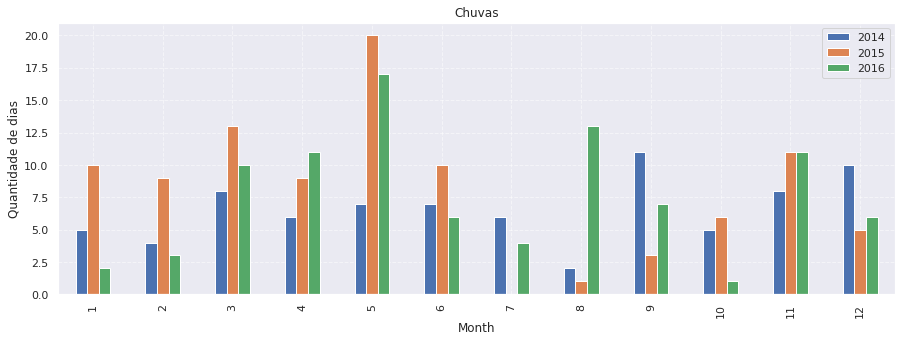

In [355]:
# Quantidades de dias com chuva
rain = df[(df['Events'] == "Rain") | (df['Events'] == "Rain,Thunderstorm") | (df['Events'] == "Fog,Rain,Thunderstorm") | (df['Events'] == "Fog,Rain")]
agrupa_eventos(rain).plot( kind='bar', title='Chuvas', figsize=(15,5), ylabel = 'Quantidade de dias');
plt.grid(linestyle = '--', alpha = 0.5)

In [356]:
# valores do gráfico acima
agrupa_eventos(rain)

,2014,2015,2016
Month,,,
1,5,10.0,2
2,4,9.0,3
3,8,13.0,10
4,6,9.0,11
5,7,20.0,17
6,7,10.0,6
7,6,NaN,4
8,2,1.0,13
9,11,3.0,7


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


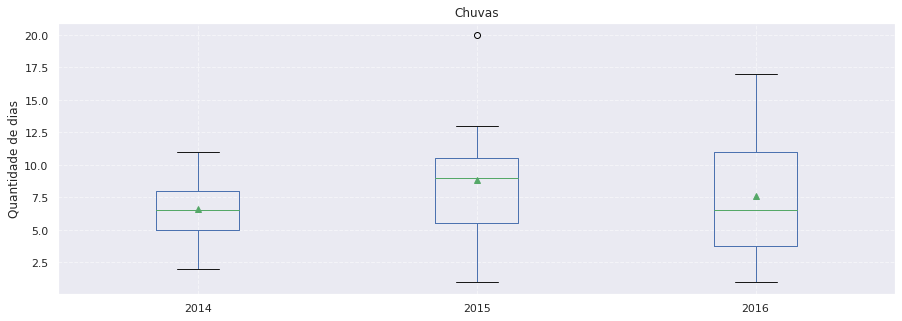

In [357]:
# Distribuição da quantidade de dias com chuvas 
agrupa_eventos(rain).plot( kind='box', title='Chuvas', figsize=(15,5), ylabel = 'Quantidade de dias', showmeans=True);
plt.grid(linestyle = '--', alpha = 0.5)

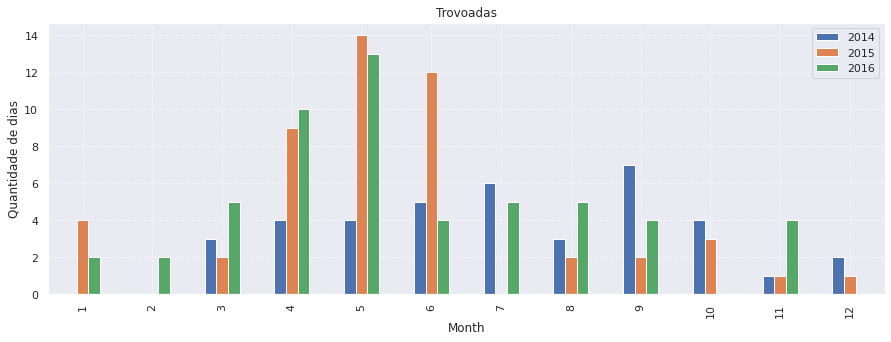

In [358]:
# Quantidades de dias com trovoadas
thunder = df[(df['Events'] == "Thunderstorm") | (df['Events'] == "Rain,Thunderstorm") | (df['Events'] == "Fog,Rain,Thunderstorm") | (df['Events'] == "Fog,Thunderstorm ")]
agrupa_eventos(thunder).plot( kind='bar', title='Trovoadas', figsize=(15,5), ylabel = 'Quantidade de dias');
plt.grid(linestyle = '--', alpha = 0.5)

In [359]:
# valores do gráfico acima
agrupa_eventos(thunder)

,2014,2015,2016
Month,,,
1,NaN,4.0,2.0
2,NaN,NaN,2.0
3,3.0,2.0,5.0
4,4.0,9.0,10.0
5,4.0,14.0,13.0
6,5.0,12.0,4.0
7,6.0,NaN,5.0
8,3.0,2.0,5.0
9,7.0,2.0,4.0


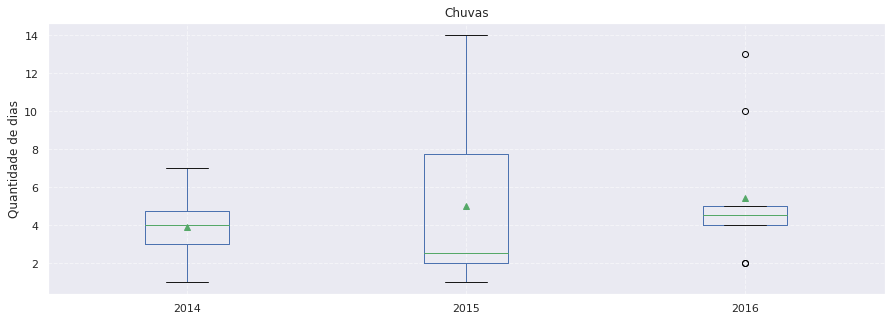

In [360]:
# Distribuição da quantidade de dias com trovoadas
agrupa_eventos(thunder).plot( kind='box', title='Chuvas', figsize=(15,5), ylabel = 'Quantidade de dias', showmeans=True);
plt.grid(linestyle = '--', alpha = 0.5)

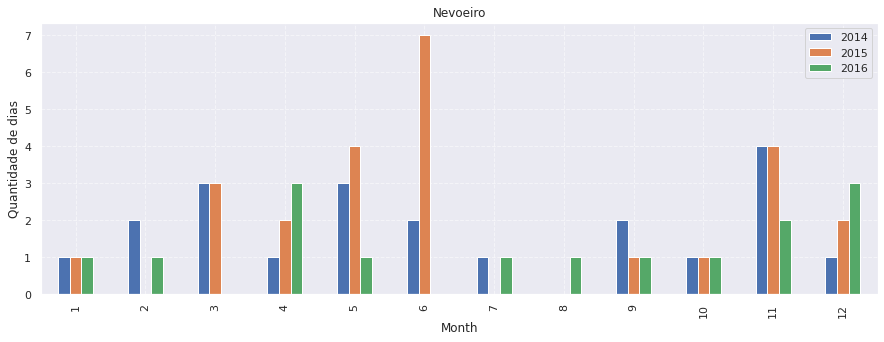

In [361]:
# Quantidades de dias com nevoeiro
fog = df[(df['Events'] == "Fog") | (df['Events'] == "Fog,Rain") | (df['Events'] == "Fog,Rain,Thunderstorm") | (df['Events'] == "Fog,Thunderstorm ")]
agrupa_eventos(fog).plot( kind='bar', title='Nevoeiro', figsize=(15,5), ylabel = 'Quantidade de dias');
plt.grid(linestyle = '--', alpha = 0.5)

In [362]:
# valores do gráfico acima
agrupa_eventos(fog)

,2014,2015,2016
Month,,,
1,1.0,1.0,1.0
2,2.0,NaN,1.0
3,3.0,3.0,NaN
4,1.0,2.0,3.0
5,3.0,4.0,1.0
6,2.0,7.0,NaN
7,1.0,NaN,1.0
8,NaN,NaN,1.0
9,2.0,1.0,1.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


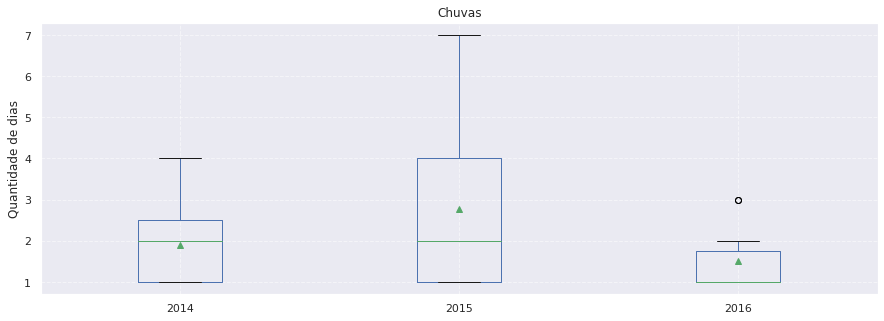

In [363]:
# Distribuição da quantidade de dias com nevoeiro
agrupa_eventos(fog).plot( kind='box', title='Chuvas', figsize=(15,5), ylabel = 'Quantidade de dias', showmeans=True);
plt.grid(linestyle = '--', alpha = 0.5)

(6.0, 28.0)

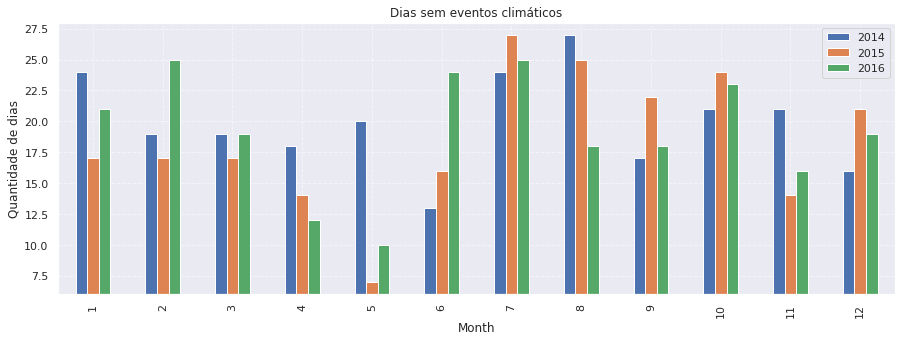

In [364]:
# Quantidades de dias sem eventos climáticos
noevent = df[df['Events'] == "None"]
agrupa_eventos(noevent).plot( kind='bar', title='Dias sem eventos climáticos', figsize=(15,5), ylabel = 'Quantidade de dias');
plt.grid(linestyle = '--', alpha = 0.5)
plt.ylim(6,28)

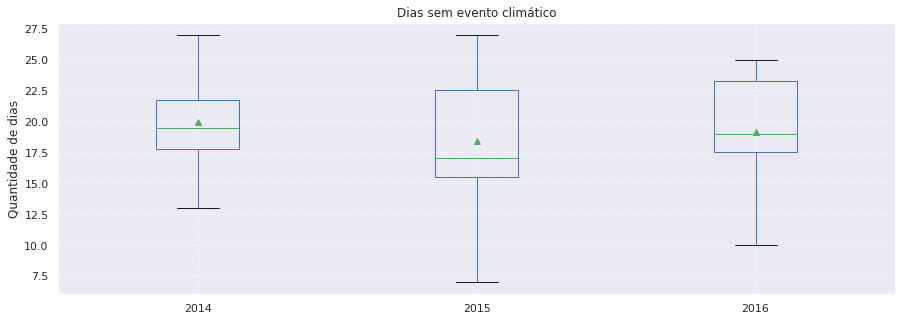

In [365]:
# Distribuição da quantidade de dias sem nenhum evento climático
agrupa_eventos(noevent).plot( kind='box', title='Dias sem evento climático', figsize=(15,5), ylabel = 'Quantidade de dias', showmeans=True);
plt.grid(linestyle = '--', alpha = 0.5)

### 2.9. Correlações entre variáveis

In [366]:
# descrição das variáveis nos anos de 2014 à 2016
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
TempHighF,989.0,80.50,14.97,32.00,71.00,83.00,93.00,105.00
TempAvgF,989.0,70.21,14.30,29.00,60.00,72.00,83.00,92.00
TempLowF,989.0,59.41,14.53,22.00,48.00,62.00,73.00,81.00
DewPointHighF,989.0,61.27,13.83,15.00,52.00,66.00,73.00,80.00
DewPointAvgF,989.0,56.37,15.15,8.00,45.00,61.00,70.00,76.00
DewPointLowF,989.0,50.72,16.56,2.00,38.00,55.00,65.00,75.00
HumidityHighPercent,989.0,0.88,0.11,0.37,0.85,0.91,0.94,1.00
HumidityAvgPercent,989.0,0.67,0.13,0.27,0.60,0.67,0.75,0.97
HumidityLowPercent,989.0,0.45,0.18,0.10,0.33,0.43,0.55,0.93
SeaLevelPressureHighInches,989.0,30.12,0.18,29.63,30.01,30.08,30.21,30.80


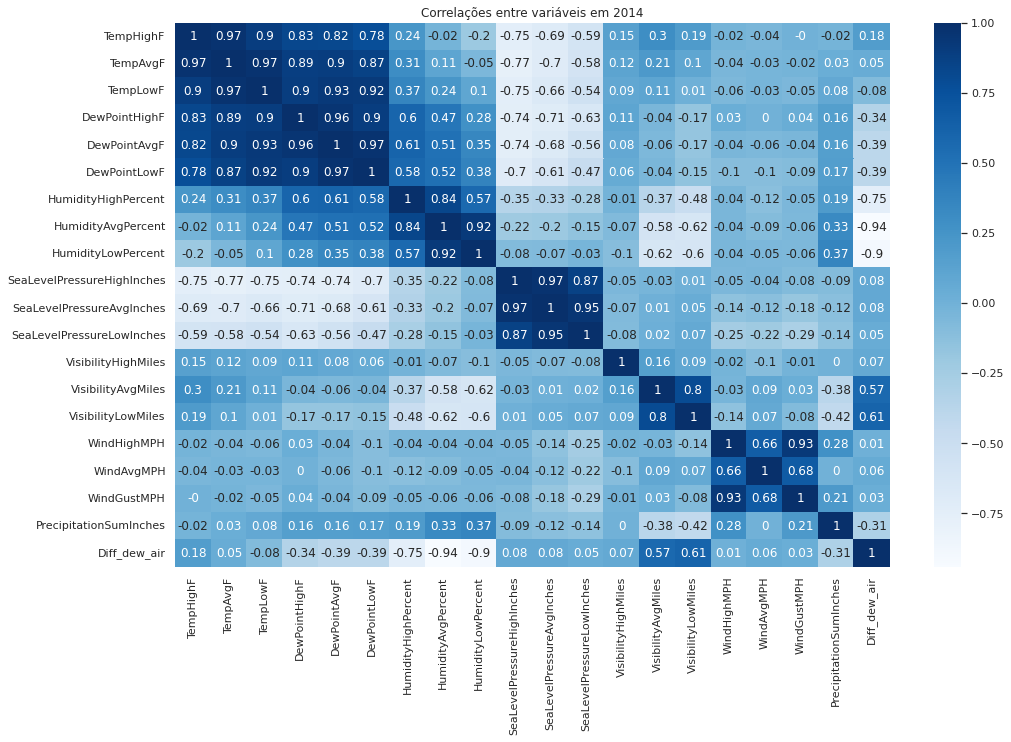

In [367]:
# Correlação entre as variáveis do ano de 2014.
plt.figure(figsize=(16, 10))
sns.heatmap(df[df['Year'] == 2014].drop(columns=['Date','Events', 'Year', 'Month']).corr().round(2), cmap = 'Blues', annot = True)
plt.title('Correlações entre variáveis em 2014')
plt.show()

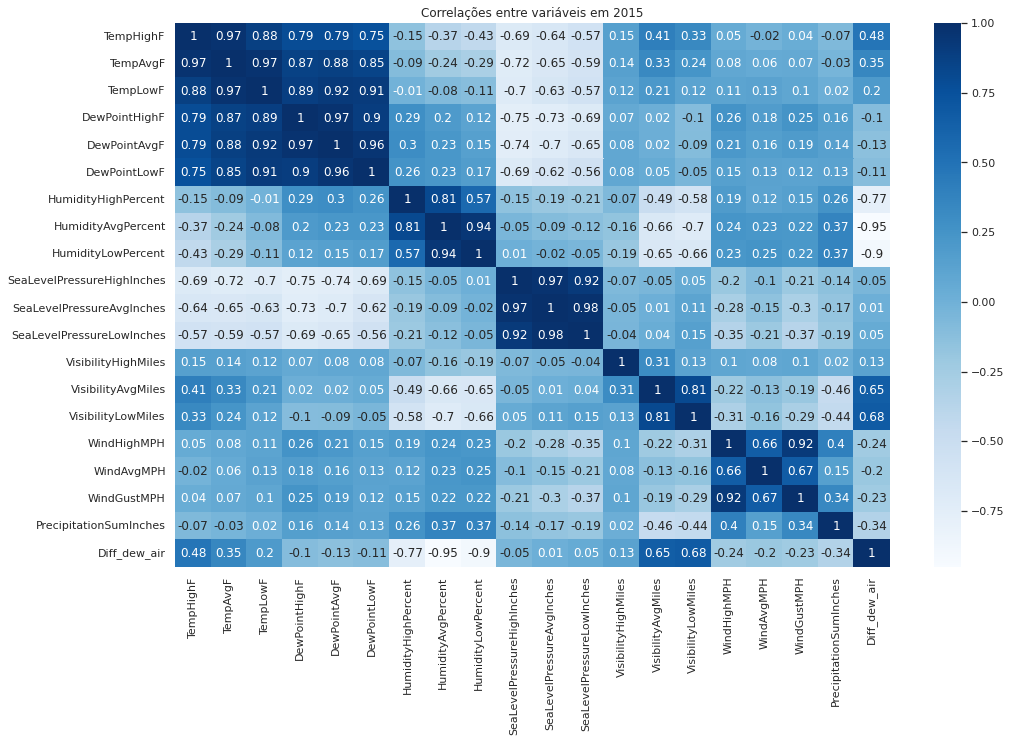

In [368]:
# Correlação entre as variáveis do ano de 2015.
plt.figure(figsize=(16, 10))
sns.heatmap(df[df['Year'] == 2015].drop(columns=['Date','Events', 'Year', 'Month']).corr().round(2), cmap = 'Blues', annot = True)
plt.title('Correlações entre variáveis em 2015')
plt.show()

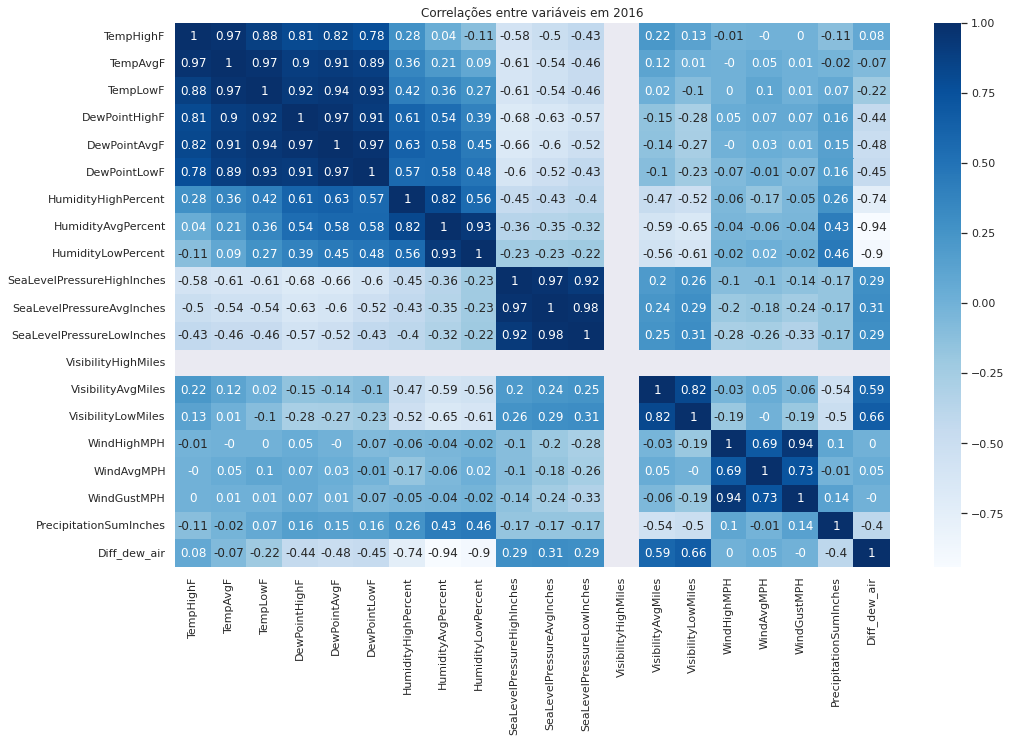

In [369]:
# Correlação entre as variáveis do ano de 2016. Este gráfico os valores de visibilidade máxima não plotaram pois, são os mesmos de 10 milhas.
plt.figure(figsize=(16, 10))
sns.heatmap(df[df['Year'] == 2016].drop(columns=['Date','Events', 'Year', 'Month']).corr().round(2), cmap = 'Blues', annot = True)
plt.title('Correlações entre variáveis em 2016')
plt.show()

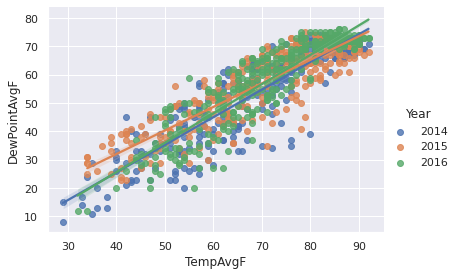

In [370]:
# correlação entre temperatura média e temperatura do ponto de orvalho
sns.lmplot(x = 'TempAvgF', y ='DewPointAvgF', data = df, hue = 'Year', height=4, aspect=1.4);

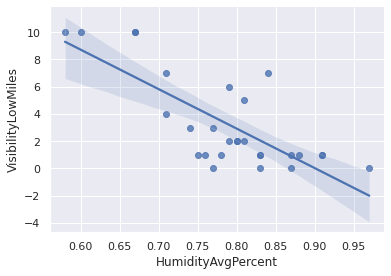

In [371]:
# correlação e umidade relativa do ar média e e visibilidade mínima de maio de 2015
maio_2015 = df[(df['Month'] == 5) & (df['Year'] == 2015)]
sns.lmplot(x = 'HumidityAvgPercent', y ='VisibilityLowMiles', data = maio_2015, height=4, aspect=1.4);

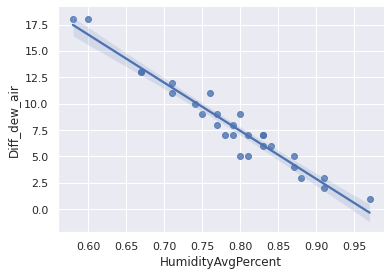

In [372]:
# correlação entre a diferença média de temperatura até o ponto de orvalho e a umidade média relativado ar
sns.lmplot(x = 'HumidityAvgPercent', y ='Diff_dew_air', data = maio_2015, height=4, aspect=1.4);

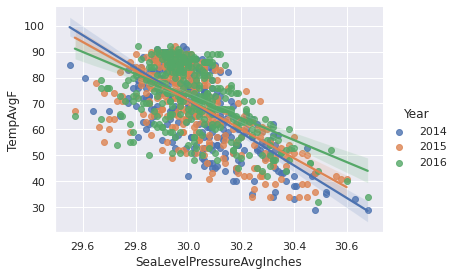

In [373]:
# correlação entre pressão à nivel do mar e temperatura 
sns.lmplot(x = 'SeaLevelPressureAvgInches', y ='TempAvgF', data = df, height=4, aspect=1.4, hue = 'Year')

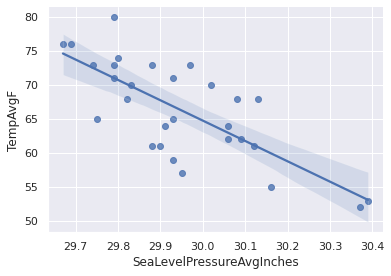

In [374]:
# correlação entre pressão à nivel do mar e temperatura de março de 2016
press_temp = df[(df['Month'] == 3) & (df['Year'] == 2016)]
sns.lmplot(x = 'SeaLevelPressureAvgInches', y ='TempAvgF', data = press_temp, height=4, aspect=1.4)

# 3. Insights -  Conclusões

* **Temperatura** - Não houve muitas variações significantes de temperatura entre os três anos, sendo observado que os meses com temperatura média mais elevada (acima de 81° Farenheit) foram junho, julho agosto e setembro, e os meses com temperatura média mais baixa (abaixo de 61° Farenheit)  foram janeiro, fevereiro e dezembro.

* **Temperatura do ponto de orvalho** - Como pode-se ver a temperatura média do ponto do orvalho teve uma alta correlação positiva (Diretamente proporcionais, quando um esta alto o outro também está e vice-versa) com a temperatura média do ar. A diferença entre a temperatura média do ar até a temperatura do ponto de orvalho teve correlação alta negativa (inversamente proporcionais, Quando um está alto o outro está baixo e vice-versa) com a umidade média relativa do ar, ou seja quanto menor a diferença entre uma e outra mais umido o ar está. Em relação ao ano de 2016, fevereiro teve uma diferença entre a temperatura do ar e do ponto de orvalho bem acima do que os outros meses.

* **Umidade relativa do ar** - Além da correlação alta citada acima, a umidade relativa média do ar teve alta correlação negativa com a visibilidade mínima em milhas no mês de maio de 2015, onde os valores foram significativos de umidade alta, e visibilidade baixa, pois neste mês tivemos 4 dias com nevoeiro e 24 dias com chuva, o que diminuiu a visibilidade, estando relacionado a grande quantidade de precipitações que este mês teve. No ano de 2016, fevereiro teve uma umidade média relativa do ar abaixo do que os outros meses, o que explica acima a maior diferença entre a temperatura do ar e a temperatura do ponto de orvalho seguido da alta quantidade de dias sem eventos climáticos.

* **Pressão média a nível do mar** - Pode se observar que a pressão teve uma correlação negativa alta com a temperatura, ou seja, os meses com pressões altas, a temperaturas foram baixas e vice-versa.

* **Rajadas de vento** -  2014 foi um ano que teve rajadas de vento com velocidades acima dos outros anos. 

* Precipitações - O ano que teve mais precipitações foi 2015, sendo maio um grande responsável por este números, pois foi o mês que mais precipitou de 2015 em forma de chuva.